In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy

plt.style.use(['science','ieee'])
plt.rcParams['font.size'] = 13

In [60]:
# destruction of a triangle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from scipy.stats import qmc

rng = np.random.default_rng(12345678)
radius = 0.25
engine = qmc.PoissonDisk(d=2, radius=radius, seed=rng)
sample = engine.random(15)

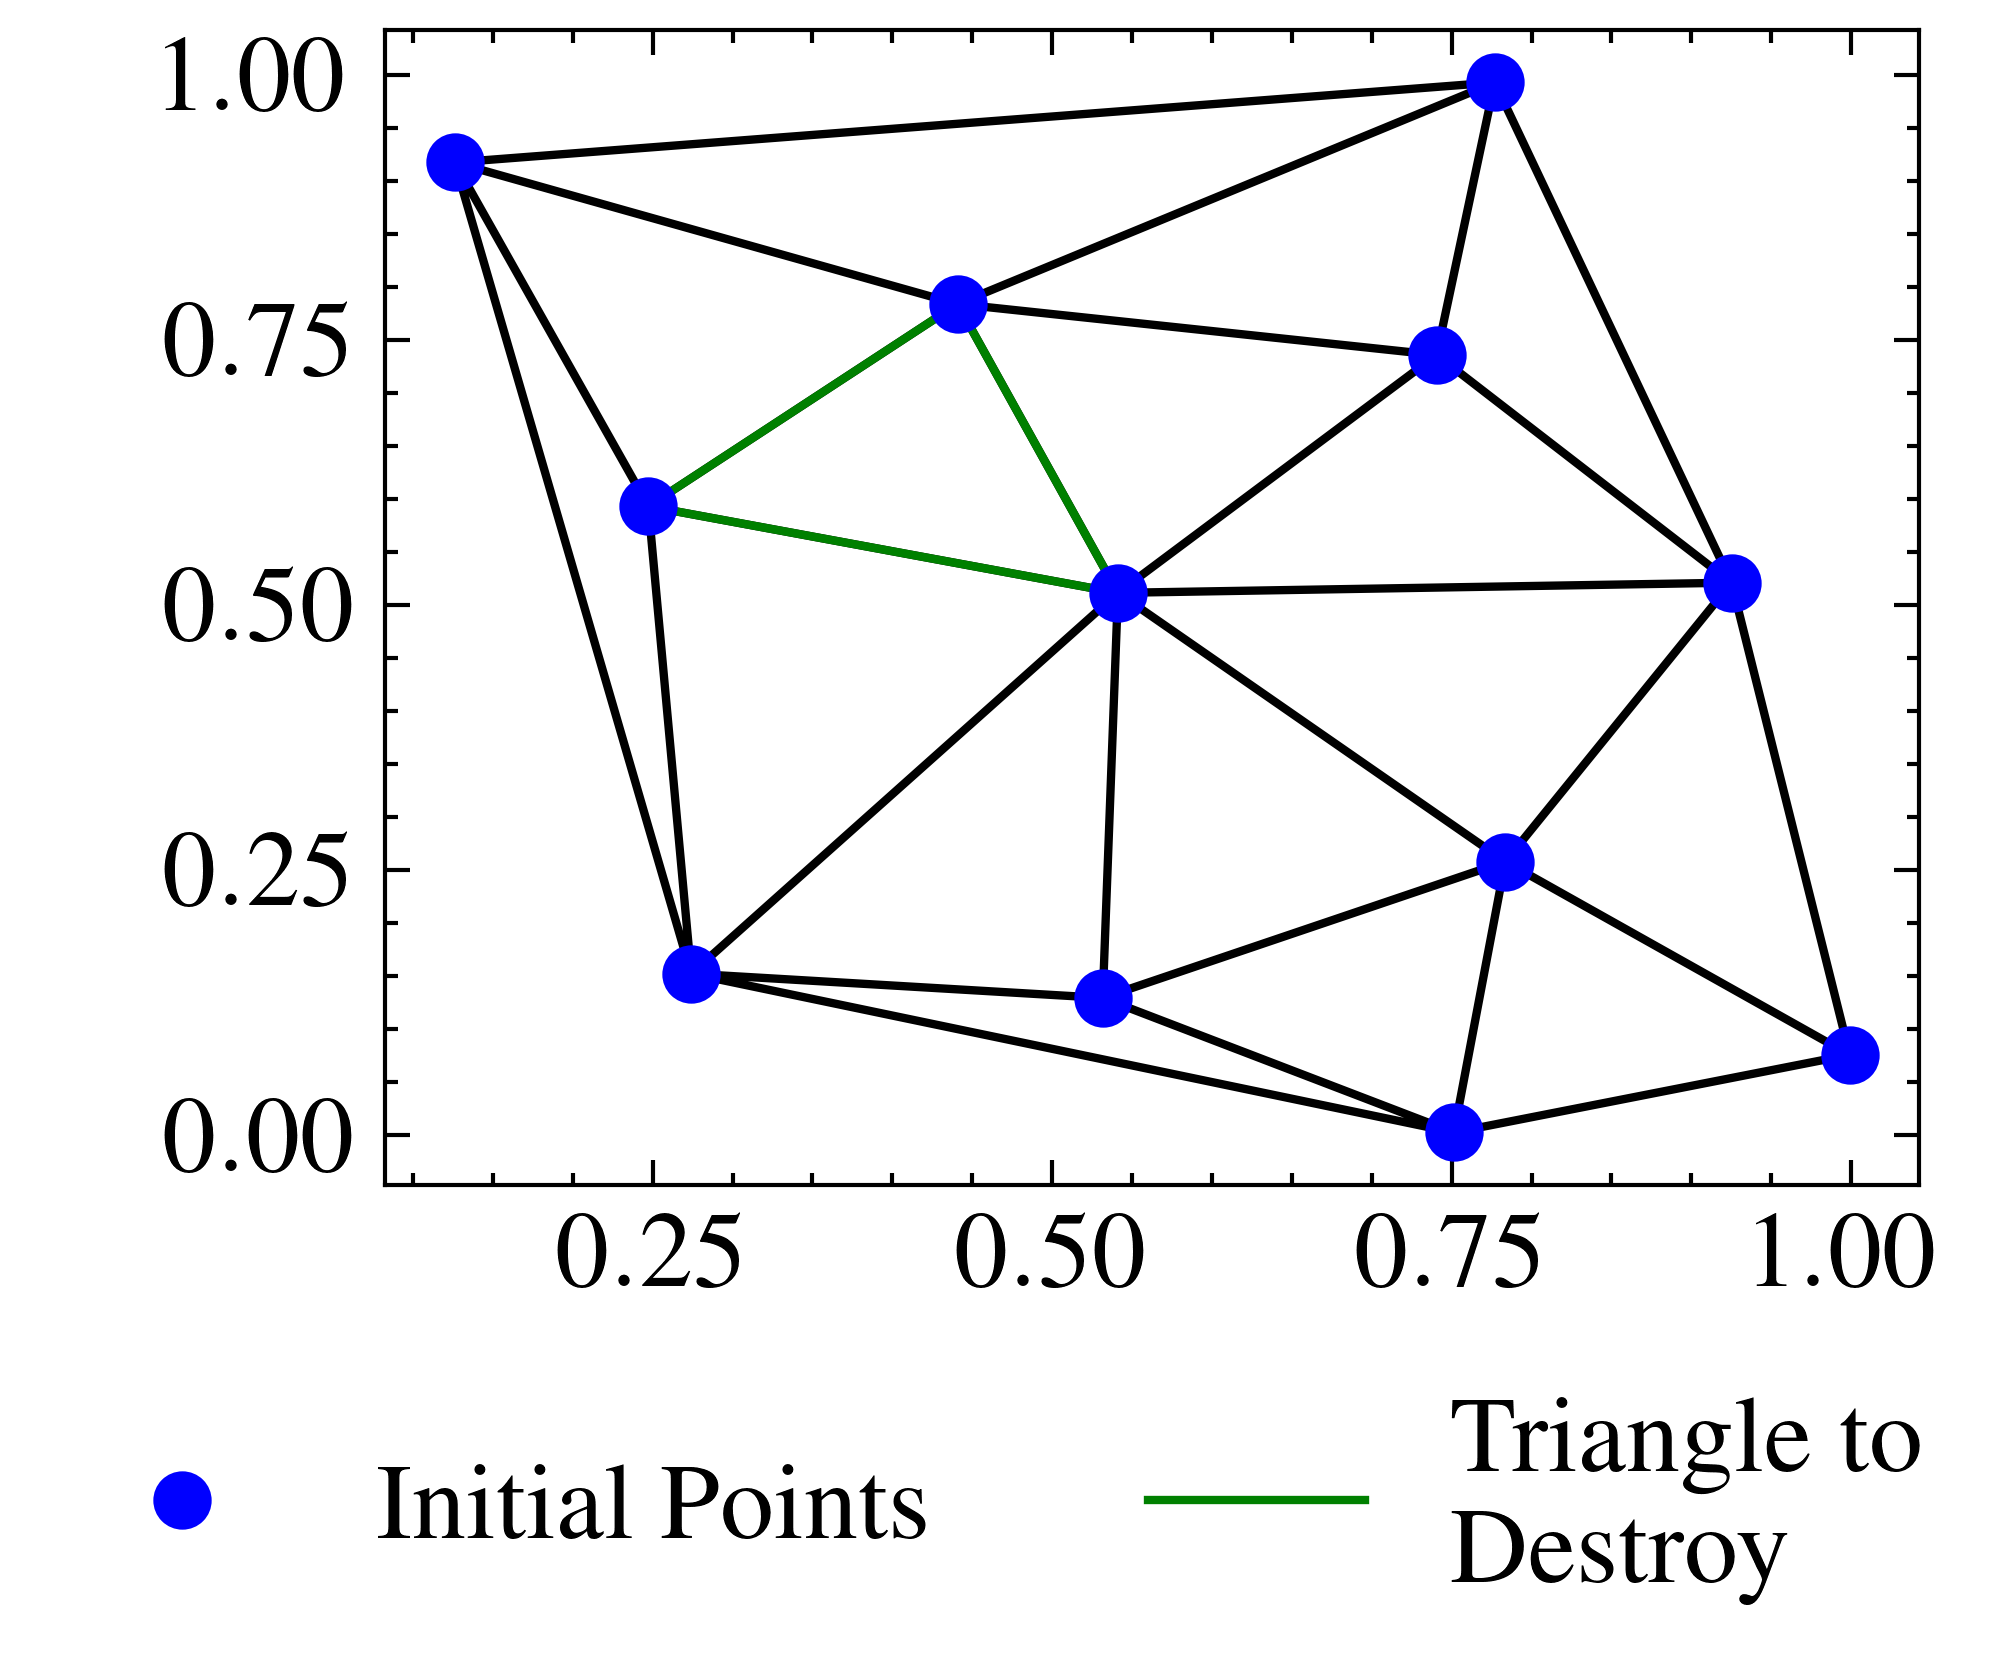

In [70]:
import scipy.spatial
tri = scipy.spatial.Delaunay(sample)

to_destroy = 7

fig, ax = plt.subplots()
ax.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
ax.plot(tri.points[:,0], tri.points[:,1], 'o', label="Initial Points")
ax.triplot(tri.points[tri.simplices[to_destroy],0], tri.points[tri.simplices[to_destroy],1], label="Triangle to\nDestroy")
#ax.legend(facecolor='white', framealpha=1, frameon=True)
ax.legend(loc='upper center',bbox_to_anchor=(0.4, -0.1),
          fancybox=True, shadow=True, ncol=2)
plt.savefig("figures/pre_destroy_triangle.pdf")

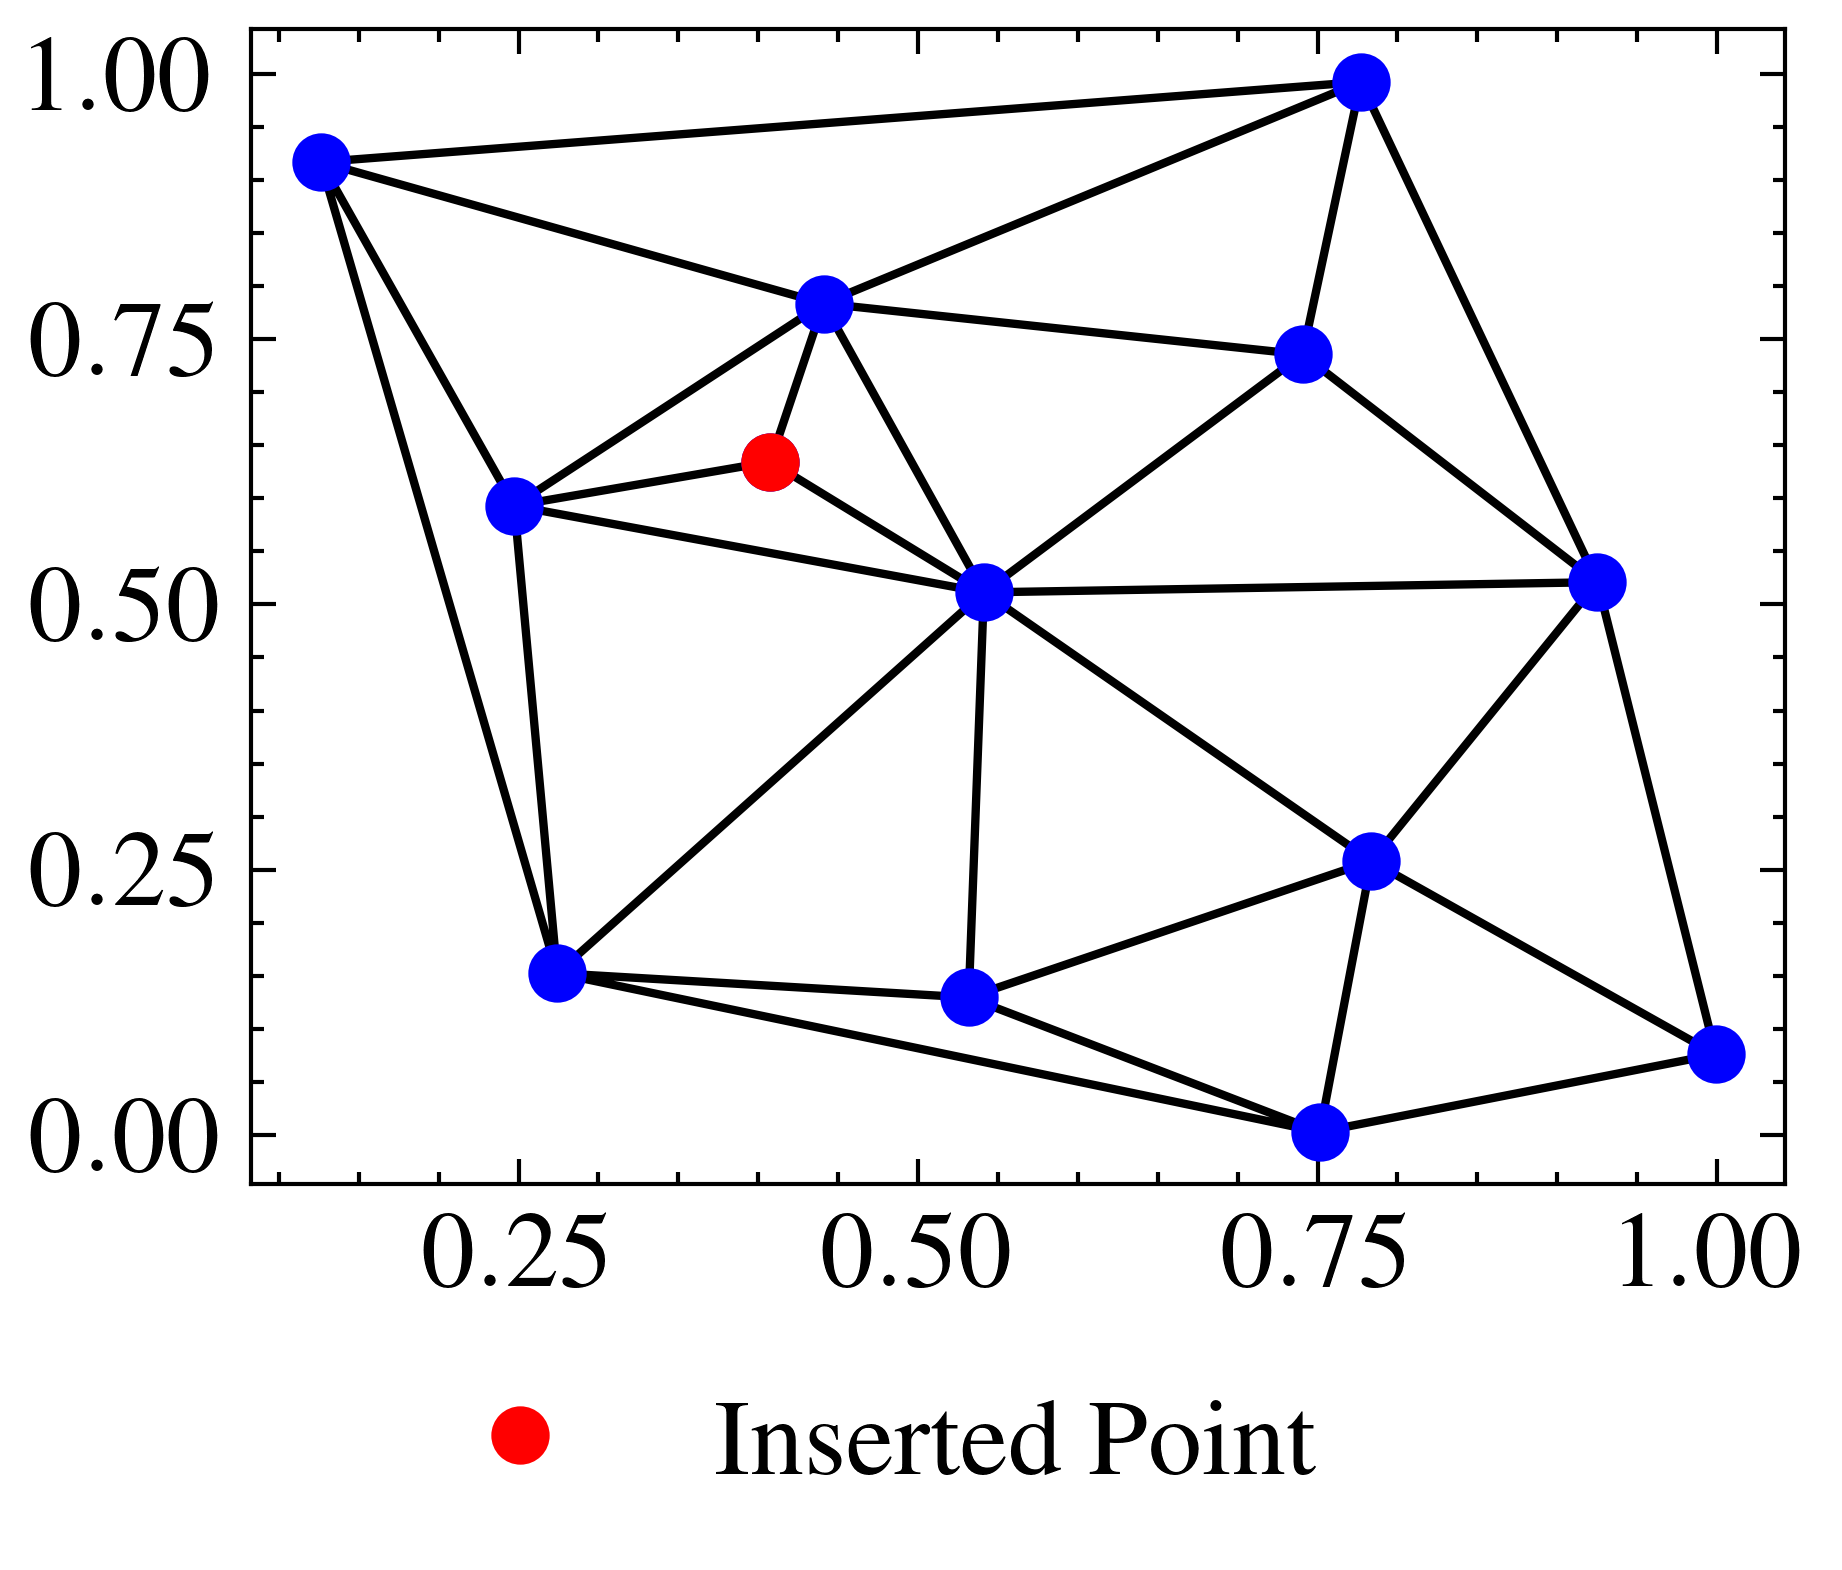

In [71]:
from poles_roots._utils import compute_incenter

A, B, C = tri.points[tri.simplices[to_destroy],:]
point = compute_incenter(A,B,C)

tri = scipy.spatial.Delaunay(np.concatenate([tri.points, point[None, :]]))

fig, ax = plt.subplots()
ax.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
ax.plot(tri.points[:,0], tri.points[:,1], 'o')
ax.plot(point[0], point[1], 'ro', label="Inserted Point")
#ax.legend(facecolor='white', framealpha=1, frameon=True)
ax.legend(loc='upper center',bbox_to_anchor=(0.4, -0.1),
          fancybox=True, shadow=True, ncol=1)
plt.savefig("figures/post_destroy_triangle.pdf")